In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from equipartition import Equipartition
import time
from matplotlib.ticker import AutoMinorLocator

In [2]:
_, MP23betaeqN = np.loadtxt("MP23betaeqNdata.txt", delimiter = ",").T; print(MP23betaeqN)

MP23gammaBetaData = np.loadtxt("MP23gammaBetaData.txt", delimiter = ",").T
MP23offAxisGammaBeta = MP23gammaBetaData[1:]

MP23reqData = np.loadtxt("MP23reqData.txt", delimiter = ",").T
MP23offAxisReq = MP23reqData[1:-1]
MP23reqN = MP23reqData[-1]

MP23energyData = np.loadtxt("MP23energyData.txt", delimiter = ",").T
MP23offAxisEnergy = MP23energyData[1:-1]
MP23energyN = MP23energyData[-1]

colors = ["#321C46", "#553CA5", "#006EB2", "#96B4DF", "#F0E442", "#E69F00", "#D55E00", "#750000", "#330A0A"]

[0.04396121 0.04701179 0.05467206 0.04780695 0.03655463 0.06686163
 0.04943786 0.03655463]


In [3]:
fileName = "Cendes_et_al_2021.xlsx" # Table 2 data AT 2019dsg of Cendes et al 2021 used in MP23 figure 3

data_pd = pd.read_excel(fileName)
data = data_pd.to_numpy()
data_pd

p = 2.7
epse = 0.1

In [4]:
z = data[:, 7]
tdays = data[:, 0]
FpmJy = data[:, 2]
logNup = data[:, 5]

z = z[2:] # drop the lowest two times
tdays = tdays[2:]; print("time in days:\n", tdays)
FpmJy = FpmJy[2:]
logNup = logNup[2:]

nup10 = 10**logNup/1e10

theta = np.logspace(-0.6, 0.2, 9)

time in days:
 [ 60.  80.  82. 130. 161. 188. 300. 561.]


In [5]:
start = time.time()

equip_Newtonian = Equipartition(FpmJy, nup10, tdays, z, 0, newtonian = True, p = p, corr = True, BDfactor = True, hotprotons = False, numelectrons = False, outofequipartition = False)

end = time.time()

print("time to run Newtonian:", (end - start) * 1000, "ms")

start = time.time()

equip_onAxis = [Equipartition(FpmJy, nup10, tdays, z, thet, newtonian = False, onAxis = True, p = p, corr = True, BDfactor = True, hotprotons = False, numelectrons = False, outofequipartition = False) for thet in theta] # solving ~70 four velocities
equip_offAxis = [Equipartition(FpmJy, nup10, tdays, z, thet, newtonian = False, onAxis = False, p = p, corr = True, BDfactor = True, hotprotons = False, numelectrons = False, outofequipartition = False) for thet in theta] # solving ~70 four velocities

end = time.time()
print("time to run relativistic:", (end - start) * 1000, "ms")

time to run Newtonian: 66.61009788513184 ms
time to run relativistic: 1148.057222366333 ms


In [6]:
print(equip_Newtonian.energyeq())

[3.96012889e+46 6.43154659e+46 6.48970965e+46 1.45289780e+47
 1.18033405e+47 2.84398303e+47 2.46540620e+47 1.91040711e+47]


C:\Users\rohdo\AppData\Local\Temp\ipykernel_60956\416163940.py:59: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad = 0, h_pad = -2.1)


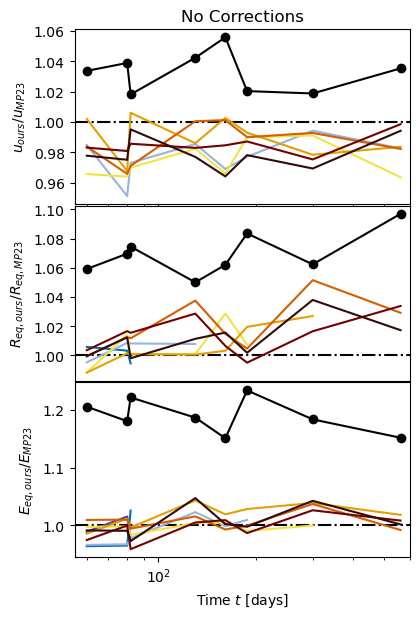

In [7]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5, .5, .5, 1.0)
# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(-0.6, 0.2 + 1e-14, 0.1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(3, 1, layout='constrained', figsize=(4,6))
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

xleft = 55
xright = 600

alpha = lambda i: 1/(i + 1)

ax1.set_title("No Corrections")
ax1.set_xscale("log")
ax1.set_xlim(xleft, xright)
ax1.set_ylabel(r"$u_{ours}/u_{MP23}$")
ax1.axhline(1, linestyle = "-.", color = "k")
ax1.plot(tdays, equip_Newtonian.gammaBeta()/MP23betaeqN, color = "k", marker = "o")
#for i in range(0, len(theta) - 1):
    # Note that betaeqN is approximately the on axis solution in this case FAIL don't have data to do on axis comparison with all angles
    #ax1.fill_between(tdays, equip_onAxis[i].gammaBeta()/MP23betaeqN, equip_onAxis[i + 1].gammaBeta()/MP23betaeqN, color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
    #ax1.fill_between(tdays, equip_offAxis[i].gammaBeta()/MP23offAxisGammaBeta[i], equip_offAxis[i + 1].gammaBeta()/MP23offAxisGammaBeta[i + 1], color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
for i in range(0, len(theta)):
    ax1.plot(tdays, equip_offAxis[i].gammaBeta()/MP23offAxisGammaBeta[i], color = colors[i]) # color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))

ax2.set_xscale("log")
ax2.set_xlim(xleft, xright)
ax2.set_ylabel(r"$R_{eq,ours}/R_{eq,MP23}$")
ax2.axhline(1, linestyle = "-.", color = "k")
ax2.plot(tdays, equip_Newtonian.Req()/MP23reqN, color = "k", marker = "o")
#for i in range(0, len(theta) - 1):
#    ax2.fill_between(tdays, equip_onAxis[i].Req(), equip_onAxis[i + 1].Req(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
#    ax2.fill_between(tdays, equip_offAxis[i].Req(), equip_offAxis[i + 1].Req(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
for i in range(0, len(theta)):
    ax2.plot(tdays, equip_offAxis[i].Req()/MP23offAxisReq[i], color = colors[i])

ax3.set_xscale("log")
ax3.set_xlim(xleft, xright)
ax3.set_xlabel(r"Time $t$ [days]")
ax3.set_ylabel(r"$E_{eq,ours}/E_{MP23}$")
ax3.axhline(1, linestyle = "-.", color = "k")
ax3.plot(tdays, equip_Newtonian.energyeq()/MP23energyN, color = "k", marker = "o")#, lw = 0.5)
#for i in range(0, len(theta) - 1):
#    ax3.fill_between(tdays, equip_onAxis[i].energyeq(), equip_onAxis[i + 1].energyeq(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
#    ax3.fill_between(tdays, equip_offAxis[i].energyeq(), equip_offAxis[i + 1].energyeq(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
for i in range(0, len(theta)):
    ax3.plot(tdays, equip_offAxis[i].energyeq()/MP23offAxisEnergy[i], color = colors[i])

#plt.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
plt.tight_layout(pad = 0, h_pad = -2.1)
#cax = fig.add_axes([0.44, 0.315, 0.5, 0.005])
#cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm = norm, cmap = cmap), cax = cax, orientation = "horizontal", label = r"$\log_{10}(\theta)$", location = "top")
#cbar.ax.tick_params(labelsize=7)

plt.savefig("MP23reprodComparison.svg")
plt.savefig("MP23reprodComparison.png")

Corrections like out of equipartition, electrons radiating at $\nu_m$, and hot protons can also be done by passing keywords. Here we apply hot proton and electrons radiating at $\nu_m$ corrections.

In [9]:
start = time.time()

equip_Newtonian = Equipartition(FpmJy, nup10, tdays, z, 0, newtonian = True, epse = epse, p = p, corr = True, outofequipartition = False) #gammaM_newtonian = 0.2)

end = time.time()

print("time to run Newtonian:", (end - start) * 1000, "ms")

start = time.time()

equip_onAxis = [Equipartition(FpmJy, nup10, tdays, z, thet, newtonian = False, onAxis = True, epse = epse, p = p, corr = True, outofequipartition = False) for thet in theta] # solving ~70 four velocities
equip_offAxis = [Equipartition(FpmJy, nup10, tdays, z, thet, newtonian = False, onAxis = False, epse = epse, p = p, corr = True, outofequipartition = False) for thet in theta] # solving ~70 four velocities

end = time.time()
print("time to run relativistic:", (end - start) * 1000, "ms")

time to run Newtonian: 8.09168815612793 ms
time to run relativistic: 1159.7824096679688 ms


In [10]:
print("on axis gamma_m for largest angle:", equip_onAxis[-1].gammaM())
print("off axis gamma_m for largest angle:", equip_offAxis[-1].gammaM())

on axis gamma_m for largest angle: [0.23450389 0.26886412 0.3441214  0.27976906 0.17272425 0.50831875
 0.28498566 0.16576064]
off axis gamma_m for largest angle: [472.45598698 443.89201088 396.05837992 435.86957662 542.14472396
 329.30191263 432.1841587  552.17585621]


C:\Users\rohdo\AppData\Local\Temp\ipykernel_60956\3513773110.py:73: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad = 0, h_pad = -2.1)


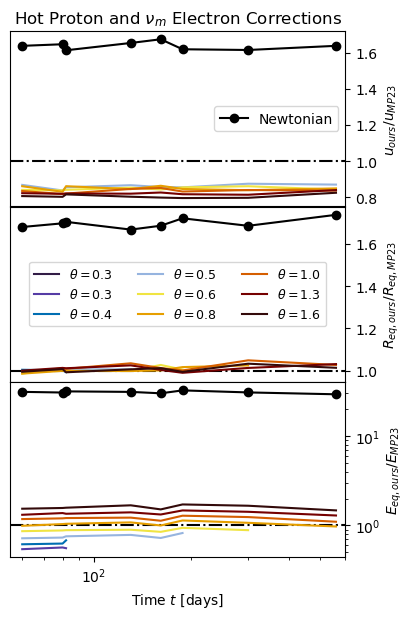

In [11]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5, .5, .5, 1.0)
# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(-0.6, 0.2 + 1e-14, 0.1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(3, 1, layout='constrained', figsize=(4,6))
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

xleft = 55
xright = 600

alpha = lambda i: 1/(i + 1)

#ax1.tick_params(axis='both', which='minor', labelbottom=False, labelleft=False)
#ax1.yaxis.set_minor_locator(AutoMinorLocator(100))
ax1.set_title(r"Hot Proton and $\nu_m$ Electron Corrections")
ax1.set_xscale("log")
ax1.set_xlim(xleft, xright)
#ax1.set_yscale("log")
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")
ax1.set_ylabel(r"$u_{ours}/u_{MP23}$")
ax1.axhline(1, linestyle = "-.", color = "k")
ax1.plot(tdays, equip_Newtonian.gammaBeta()/MP23betaeqN, color = "k", marker = "o", label = "Newtonian")
#for i in range(0, len(theta) - 1):
    # Note that betaeqN is approximately the on axis solution in this case FAIL don't have data to do on axis comparison with all angles
    #ax1.fill_between(tdays, equip_onAxis[i].gammaBeta()/MP23betaeqN, equip_onAxis[i + 1].gammaBeta()/MP23betaeqN, color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
    #ax1.fill_between(tdays, equip_offAxis[i].gammaBeta()/MP23offAxisGammaBeta[i], equip_offAxis[i + 1].gammaBeta()/MP23offAxisGammaBeta[i + 1], color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
for i in range(0, len(theta)):
    ax1.plot(tdays, equip_offAxis[i].gammaBeta()/MP23offAxisGammaBeta[i], color = colors[i]) # color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))

ax1.legend()

ax2.set_xscale("log")
ax2.set_xlim(xleft, xright)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_ylabel(r"$R_{eq,ours}/R_{eq,MP23}$")
ax2.axhline(1, linestyle = "-.", color = "k")
ax2.plot(tdays, equip_Newtonian.Req()/MP23reqN, color = "k", marker = "o")
#for i in range(0, len(theta) - 1):
#    ax2.fill_between(tdays, equip_onAxis[i].Req(), equip_onAxis[i + 1].Req(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
#    ax2.fill_between(tdays, equip_offAxis[i].Req(), equip_offAxis[i + 1].Req(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
for i in range(0, len(theta)):
    ax2.plot(tdays, equip_offAxis[i].Req()/MP23offAxisReq[i], color = colors[i], label = r"$\theta=$" + str(round(theta[i], 1)))

ax2.legend(ncol = 3, prop={'size': 9}, loc = "center")

ax3.set_xscale("log")
ax3.set_xlim(xleft, xright)
ax3.set_xlabel(r"Time $t$ [days]")
ax3.set_yscale("log")
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position("right")
ax3.set_ylabel(r"$E_{eq,ours}/E_{MP23}$")
ax3.axhline(1, linestyle = "-.", color = "k")
ax3.plot(tdays, equip_Newtonian.energyeq()/MP23energyN, color = "k", marker = "o")#, lw = 0.5)
#for i in range(0, len(theta) - 1):
#    ax3.fill_between(tdays, equip_onAxis[i].energyeq(), equip_onAxis[i + 1].energyeq(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
#    ax3.fill_between(tdays, equip_offAxis[i].energyeq(), equip_offAxis[i + 1].energyeq(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
for i in range(0, len(theta)):
    ax3.plot(tdays, equip_offAxis[i].energyeq()/MP23offAxisEnergy[i], color = colors[i])

#plt.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
plt.tight_layout(pad = 0, h_pad = -2.1)
#cax = fig.add_axes([0.44, 0.315, 0.5, 0.005])
#cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm = norm, cmap = cmap), cax = cax, orientation = "horizontal", label = r"$\log_{10}(\theta)$", location = "top")
#cbar.ax.tick_params(labelsize=7)

plt.savefig("MP23corrComparison.svg")
plt.savefig("MP23corrComparison.png")

C:\Users\rohdo\AppData\Local\Temp\ipykernel_60956\2456926027.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\rohdo\AppData\Local\Temp\ipykernel_60956\2456926027.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad = 0)
C:\Users\rohdo\AppData\Local\Temp\ipykernel_60956\2456926027.py:53: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad = 0)


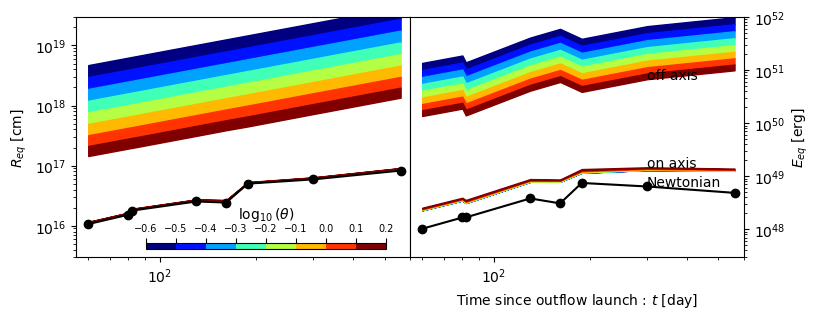

In [12]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
#cmaplist[0] = (.5, .5, .5, 1.0)
# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
# define the bins and normalize
bounds = np.arange(-0.6, 0.2 + 1e-14, 0.1)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(8,3))
ax3 = ax[0]
ax4 = ax[1]

xleft = 55
xright = 600
#plt.subplot(4, 1, 3)
ax3.set_xscale("log")
ax3.set_xlim(xleft, xright)
ax3.set_yscale("log")
ax3.set_ylim(3e15, 3e19)
ax3.set_ylabel(r"$R_{eq}$ [cm]")
ax3.plot(tdays, equip_Newtonian.Req(), color = "k", marker = "o")
for i in range(0, len(theta) - 1):
    ax3.fill_between(tdays, equip_onAxis[i].Req(), equip_onAxis[i + 1].Req(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
    ax3.fill_between(tdays, equip_offAxis[i].Req(), equip_offAxis[i + 1].Req(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))

#plt.subplot(4, 1, 4)
ax4.set_xscale("log")
ax4.set_xlim(xleft, xright)
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")
ax4.set_yscale("log")
ax4.set_xlabel(r"Time since outflow launch : $t$ [day]")
ax4.set_ylim(3e47, 1e52)
ax4.set_ylabel(r"$E_{eq}$ [erg]")
ax4.plot(tdays, equip_Newtonian.energyeq(), color = "k", marker = "o")#, lw = 0.5)
plt.annotate("Newtonian", (tdays[6], equip_Newtonian.energyeq()[6]))
for i in range(0, len(theta) - 1):
    ax4.fill_between(tdays, equip_onAxis[i].energyeq(), equip_onAxis[i + 1].energyeq(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))
    ax4.fill_between(tdays, equip_offAxis[i].energyeq(), equip_offAxis[i + 1].energyeq(), color = cmap(norm(np.log10(theta[i])/2 + np.log10(theta[i + 1])/2)))

plt.annotate("on axis", (tdays[6], equip_onAxis[-1].energyeq()[6]))
plt.annotate("off axis", (tdays[6], equip_offAxis[-1].energyeq()[6]))

#plt.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
plt.tight_layout()
cax = fig.add_axes([0.17, 0.2, 0.3, 0.02])
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm = norm, cmap = cmap), cax = cax, orientation = "horizontal", label = r"$\log_{10}(\theta)$", location = "top")
cbar.ax.tick_params(labelsize=7)

plt.tight_layout(pad = 0)
plt.savefig("MP23corrRE.svg")
plt.savefig("MP23corrRE.png")